In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Portuguese%20Bank%20Marketing%20Data%20Set/bank_cleaned.csv")
data = data.drop(columns=["Unnamed: 0","response"])
data.dropna()
data_dummy = pd.get_dummies(data) #create dummy variables
columns = list(data_dummy.columns)
columns.remove("response_binary") #drop Y variable from list of X
X = data_dummy[columns] 
Y = data_dummy["response_binary"]
#data_dummy
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,1


In [4]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,5,4.35,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,2.52,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,1.27,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,35,231,5,2.32,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,28,447,5,3.62,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,505,17,6.43,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
40837,51,825,17,16.28,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
40838,71,1729,17,7.60,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
40839,72,5715,17,18.78,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40836    1
40837    1
40838    1
40839    1
40840    0
Name: response_binary, Length: 40841, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3) #split dataset into 70 train, 30 test
lin_reg = LinearRegression().fit(x_train,y_train)
print(lin_reg.score(x_test,y_test) ) #Linear regression earns 30% accuracy

0.29873115224360436


In [7]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=3500).fit(x_train,y_train)
print(log_reg.score(x_test,y_test)) #Logistic Regression score 90% accuracy

0.9041051171141761


In [8]:
nb = GaussianNB().fit(x_train,y_train)
print(nb.score(x_test,y_test))

0.8611768546478413


In [10]:
vector = svm.LinearSVC(dual = False).fit(x_train,y_train)
print(vector.score(x_test,y_test))

0.9035338284501755


In [12]:
tree = DecisionTreeClassifier().fit(x_train,y_train)
tree.score(x_test,y_test)

0.8735819799232841

In [13]:
def AUC(model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(x_test))
    return fpr,tpr

0.6503394558163589


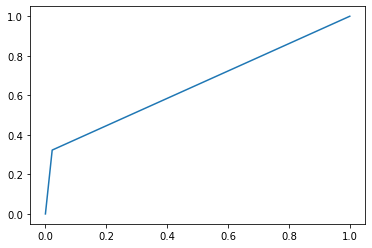

In [14]:
fpr, tpr = AUC(log_reg)
print(metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr,tpr)

0.63575857064211


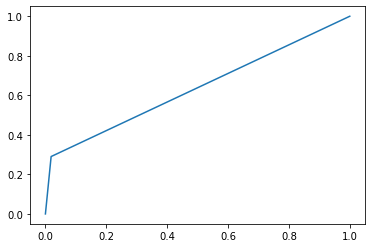

In [15]:
fpr, tpr = AUC(vector)
print(metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr,tpr)

0.6980845136212736


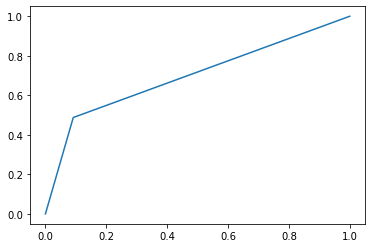

In [16]:
fpr, tpr = AUC(nb)
print(metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr,tpr)